#  Building species trees using concatenated alignments

This recipe shows how to automate the reconstruction of species trees based on a concatenated multiple sequence alignments.


## Requirements
- ete3
- ete3_external_apps
- [basic concepts about ete-build](ete_build_basics.ipynb) 
- [composing custom workflows](ete_build_workflows.ipynb)

## Recipe

Reconstructing a species tree based on several concatenated alignments requires the use of two types of workflows in `ete-build`:
- a gene-tree workflow used to align the sequences of each Orthologous Group (OG) (`-w`) 
- a workflow to concatenate all alignments and build a tree based on it (`-m`)

Typically, all sequences used in a concatenated alignment are grouped by Orthologous Groups (OGs). Within OGs, each species is expected to be represented by one and only one sequence.


### 1. Prepare data: sequences and orthologous groups 

- The COGs file must be a text file containing the same sequence IDs as in the input file. Each TAB delimited line will be considered a COG. 

   For instance, the following example would define 3 COGs of size 3, 2 and 4 sequences respectively:
```
sp1_seqA   sp2_seqA    sp3_seqA
sp1_seqB   sp2_seqB    
sp1_seqC   sp3_seqC    sp4_seqC    sp5_seqC
```          

- By default, the expected format for the sequence names/identifiers is *`SpeciesCode_SequenceName`*. The species code should allways precede the sequence names, but you can change the default underscore delimiter character using `--spname-delimiter`.

- All sequences must be provided in a single FASTA file. 


### 2. Choose a gene-tree workflow for aligning sequences within each OG

Sequences belonging to OGs must be aligned prior to concatenation. Any ete-build gene-tree workflow can be selected for that and passed with the `-w` option. 

If an alignment trimming step is present in the gene-tree workflow, the trimmed version of the alignment will be used for concatenation. 


### 3. Choose a workflow to select OGs and infer final tree

Supermatrix (concatenated) workflow names are defined in a very similar way as gene-tree workflows. 

There are three master tasks in a supermatrix workflow: 

- OG selection: Used to define the set of OGs that will be used to build the concatenated alignment. Although this can be done manually, `ete-build` offers several automatic options to discards OGs missing a given percentage of species. 

In most cases, the _OG selection_ step will default to `cog_all`, meaning that all the clusters of Orthologous Groups provided should be used. However, other options are possible:
- `cog_100`: Use only OGs containing sequences from all (100%) species
- `cog_90`: Use only OGs containing sequences from at least 90% of the target species

- Alignment concatenation: This task accepts no options at the moment. It is used to call the gene-tree workflow selected with the '-w' option, retrieve results and concatenate alignments. 

- Tree inference: Used to infer the tree based on the concatenated alignment. 


#### Other considerations

- the set of target species is automatically determined based on the set of sequences provided (all species detected are considered). However, one can limit the set of target species by providing a custom list with the `--target-species` argument. 







In [5]:
%%bash 
ete3 build --cpu 4 -w clustalo_default-trimal01-none-none -m cog_100-alg_concat_default-fasttree_default -o basic_sptree/ \
    --clearall -a data/proteome_seqs.fa.gz --cogs data/cogs.txt

Toolchain path: /Users/jhc/anaconda/bin/ete3_apps 
Toolchain version: 2.0.3


      --------------------------------------------------------------------------------
                  ETE build - reproducible phylogenetic workflows 
                                    unknown, unknown.

      If you use ETE in a published work, please cite:

        Jaime Huerta-Cepas, Joaquín Dopazo and Toni Gabaldón. ETE: a python
        Environment for Tree Exploration. BMC Bioinformatics 2010,
        11:24. doi:10.1186/1471-2105-11-24

      (Note that a list of the external programs used to complete all necessary
      computations will be also shown after execution. Those programs should
      also be cited.)
      --------------------------------------------------------------------------------

    
INFO -  Testing x86-64  portable applications...
       clustalo: OK - 1.2.1
Dialign-tx not supported in OS X
       fasttree: OK - FastTree Version 2.1.8 Double precision (No SSE3), OpenMP (2 threa

The resulting tree image will contain an overview of the concatenated alignment (not that this can be huge in some cases)

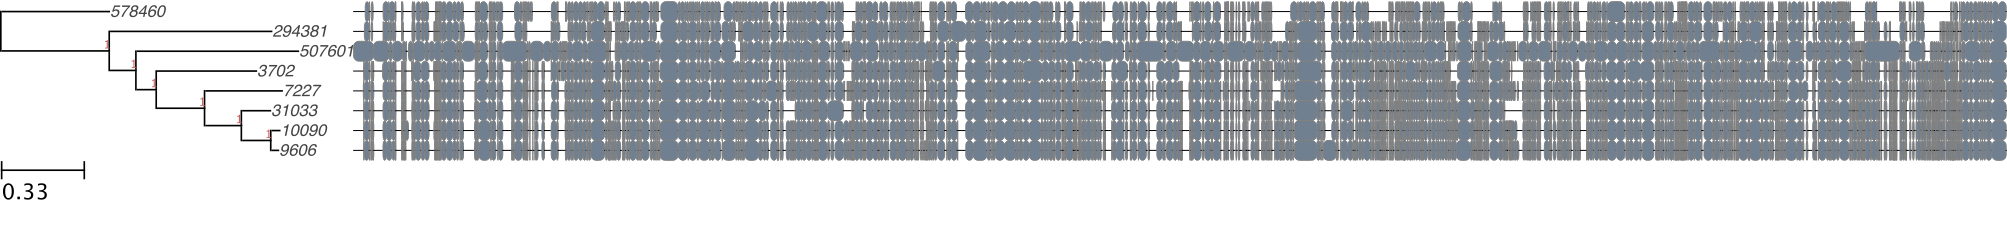

In [32]:
from IPython.display import Image
Image(filename='basic_sptree/cog_100-alg_concat_default-fasttree_default/proteome_seqs.fa.gz.final_tree.png')

Note that leaf names correspond to the species names encoded as part of the sequence names. 
However, as we know that those species names are NCBI taxids, we can play some annotation magic to get a more readable result: 

In [33]:
%%bash
cp basic_sptree/cog_100-alg_concat_default-fasttree_default/proteome_seqs.fa.gz.final_tree.nw sptree.nw
ete3 annotate --ncbi -t sptree.nw | ete3 view --ncbi --image sptree.png --Iw 700

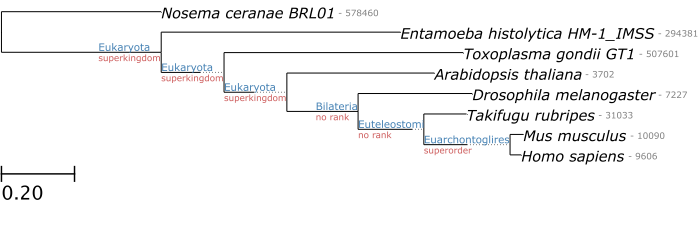

In [30]:
from IPython.display import Image
Image(filename='sptree.png')